In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1. Binary Logistic

$$
p(y=1|x) = \sigma(w^Tx) = \frac{1}{1 + e^{-w^Tx}} \\
 \\
p(y=0|x) = 1 - p(y=1|x)
 \\
$$

Therefore, $y_n \sim Bern(n, p_n)$

$$
p(y_n= y|x_n) = p_n^{y_n} (1 - p_n)^{1 - y_n} = \sigma(w \cdot x_n)^{y_n} (1 - \sigma(w \cdot x_n))^{1 - y_n}
$$

The negative log-likelihood function is

$$
NLL(\theta) = -\sum^N  y_n log(p(x_n)) - (1 - y_n)log(1 - p(x_n)) \\
$$

In [141]:
def logistic(z):
    return 1 / (1 + np.exp(-z))


class BinaryLogistic:
    def __init__(self):
        pass

    def fit(self, X, y, ln=0.001, iters=10):
        N, D = X.shape

        theta_hat = np.random.randn(D)
        for i in range(iters):
            print('BCE', self.crossEntropyLoss(X, y, theta_hat))
       
            p = logistic(X @ theta_hat)
            grad = X.T @ (p - y)
            theta_hat -= ln * grad

        self.theta_hat = theta_hat

    def crossEntropyLoss(self, X, y, theta):
        epsilon = 1e-12

        p = logistic(X @ theta)

        cost = -np.average(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))

        return cost

    
    def prob(self, X_test):
        self.p = logistic(X_test @ self.theta_hat)
        return self.p.round()


## Real Data

In [169]:
digits = datasets.load_digits(2) # binary classificatin (0 or 1)

X, y = digits.data, digits.target
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28)

X_train.shape, y_train.shape, X_test.shape


/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_class=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


((259, 65), (259,), (101, 65))

In [170]:

binary_model = BinaryLogistic()

binary_model.fit(X_train, y_train)

binary_model.theta_hat


BCE 11.043368873579483
BCE 14.29558621441815
BCE 7.682378475812468
BCE 2.6094613188973956
BCE 0.059817388536504146
BCE 0.04540664227193584
BCE 0.03106299594231775
BCE 0.016773149164500543
BCE 0.0041681186598299365
BCE 0.0005970204764303588


array([-0.05313839,  0.68359147, -0.55600689,  0.59574491,  0.02318374,
       -0.01263818,  2.63751852,  1.29996307, -0.86991445,  1.46452975,
        0.86626591, -1.77336867,  0.749387  ,  0.24510524, -1.42616194,
       -0.6301106 ,  0.09674745,  0.58608234, -1.03062861, -1.04934278,
        1.0252163 ,  2.92567215, -0.71190771, -1.254642  ,  1.02733547,
        0.12040288, -1.22822425, -1.58041742,  1.18920774,  2.02352539,
        0.44362551, -4.23013414,  0.37688234,  0.53947212, -2.34114712,
       -1.35431136,  1.14661599,  2.41477921, -0.40457462, -1.91879147,
        0.01434463,  0.67398548,  1.13328737, -0.67827478,  1.46717163,
        2.29357758,  0.48950785,  0.81810845, -1.73286371,  0.11091836,
       -0.13709872, -3.54306064, -0.41144273,  0.17839872,  0.75779087,
       -1.10351012,  0.57398631, -0.05644851, -0.41650461,  0.16725257,
        0.17553606,  0.44115243, -0.11069211,  0.48908762,  0.18458499])

In [171]:
print('correct num', np.sum(binary_model.prob(X_test) == y_test))

print('accuracy', np.mean(binary_model.prob(X_test) == y_test))

binary_model.crossEntropyLoss(X_test, y_test, binary_model.theta_hat)


correct num 101
accuracy 1.0


1.4811868116927581e-05

(array([[44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 57.]]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 <a list of 2 BarContainer objects>)

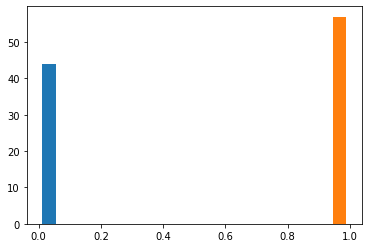

In [172]:
yhat = binary_model.prob(X_test)

fig, ax = plt.subplots()
bins = np.linspace(0, 1, 10)
ax.hist([binary_model.p[yhat == 0], binary_model.p[yhat == 1]], bins)


# 2. Multiclass Logistic 